In [1]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# reference : https://github.com/cjhutto/vaderSentiment

In [2]:
data = pd.read_csv('Data/aftercorona.csv', sep = ',')
data.head()

,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,site
0,2.730776e+07,50931,AppelquistP,Damn I thought I was finally in the #Matrix or...,0,OZ,18/06/2021,130,False,0,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json
1,2.880588e+09,27578,kaarnama13,â€œNosediveâ€ episode from #blackmirror gets ...,0,Aage se right,18/06/2021,669,False,6,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json
2,2.370116e+09,115767,Niggvtivity,I've just watched episode S03 | E05 of Black M...,0,"Bonneuil-sur-Marne, France",18/06/2021,795,False,0,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json
3,4.817271e+07,4971,DystopicRedhead,The perfect description of the #Tories and the...,4,United Kingdom,18/06/2021,2117,False,8,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json
4,1.402080e+18,13,smash_media_us,ã€ #ONEUS Ã— #smash. ã€‘\n\nONEUS is on now s...,0,NaN,18/06/2021,762,False,5,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json


In [3]:
shuffled_df = data.sample(frac=1, random_state= 42) # shuffle data for random tweets to look at

In [4]:
# filter out line breaks, hat is easier for manually looking at the data afterwards...
shuffled_df['tweet'] = shuffled_df.tweet.str.replace('\n', '')
shuffled_df['tweet'] = shuffled_df.tweet.str.replace('\r', '')

In [5]:
 # filter out 50 first tweets from shuffled data
 shuffled_df[['tweet']].iloc[0:50]#.to_csv('Data/vader_eval.csv') 

,tweet
907,Revisiting #Prisonbreak ... https://t.co/t1qeJ...
135,Tags because I forgot: #ONEUS #ì›ì–´ìŠ¤ #Tomo...
785,I've just watched episode S03 | E08 of Narcos!...
1401,Rebel Robin: Surviving Hawkins by @Netflix @St...
598,Tokyo is such a horrible character 0 character...
931,The One We Really Knew Would Win Over A Jury. ...
23,"""Have you ever seen a portal?"" Those who love ..."
1096,kisses like pink cotton candy... #riverdale #b...
382,"Word, Steelshanks lost Aeron Greyjoy! #GameOfT..."
585,Vote for you favorite international web series...


In [6]:
shuffled_df.tweet.iloc[785]

'Demon time #MoneyHeist #deeperthanrap https://t.co/qLBZ4351Ch'

In [7]:
#read in the vader data frame for evaluation
data = pd.read_csv('Data/Vader_Eval_Original.csv', sep = ',')


In [8]:
# read in the data from the manually labelled data
label = pd.read_csv('Data/vader_eval_labelled.csv', sep = ';')

In [9]:
# change compound from continous to categorical variable
data["compound"] = np.where(data["compound"] >= 0.05, 1, data["compound"])
data["compound"] = np.where(data["compound"] <= -0.05, -1, data["compound"])
data["compound"] = np.where((data["compound"] > -0.05) & (data["compound"] < 0.05), 0, data["compound"])


In [13]:
pd.set_option('display.max_colwidth', None)

In [23]:
data[['tweet', 'compound']].loc[10]

tweet       @netflix Please I need another season of #BlackMirror it's my favorite. Please!
compound                                                                                  1
Name: 10, dtype: object

In [115]:
# inner merge for only data with vader and manual sentiment, merging on indexes

merged_df = pd.merge(data, label, right_on='Unnamed: 0', left_on='Unnamed: 0', how = 'inner').drop(['tweet_y'], axis=1) # Unnamed is here the old index for some reason

In [116]:
merged_df.head()

,Unnamed: 0,user_id,user_statuses,name,tweet_x,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,site,tweet_vader,compound,sentiment
0,23,2.922871e+08,5066,MKSwaine,"""Have you ever seen a portal?"" Those who love ...",0,Gibraltar,17/06/2021,1363,False,0,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,Have seen portal? Those love #DonnieDarko #Bla...,1.0,1
1,135,1.403080e+18,46,AnalysisByMagui,Tags because I forgot: \r\n#ONEUS #ì›ì–´ìŠ¤ #...,0,NaN,10/06/2021,3,False,0,1.400000e+18,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,Tags forgot: #ONEUS #ì›ì–´ìŠ¤ #Tomoon #Binary...,0.0,0
2,251,7.763117e+08,1638,firfox20,"#BreakingBad \r\nOh, I'm sorry, oh, the workst...",0,Kingdom of Saudi Arabia,16/06/2021,1409,False,1,NaN,#breakingbad,en,date post corona\2021-06-18_en_#breakingbad.json,"#BreakingBad Oh, I'm sorry, oh, workstation ðŸ˜‚",-1.0,1
3,298,4.838521e+09,353212,Tian_A1,"""Alright, tell you what. Both of you pull it o...",2,Everywhere,16/06/2021,1479,False,0,NaN,#breakingbad,en,date post corona\2021-06-18_en_#breakingbad.json,"Alright, tell what. Both pull butts right now,...",1.0,0
4,353,3.245109e+09,19592,RedditFreeFolk,haha Tyrion go duhhhhh @ r/FreeFolk &gt; https...,3,North of the wall,18/06/2021,3488,False,7,NaN,#gameofthrones,en,date post corona\2021-06-18_en_#gameofthrones....,haha Tyrion duhhhhh r/FreeFolk &gt; #GameofThr...,1.0,1


In [117]:
merged_df.Sentiment = merged_df.sentiment.astype('float64') # changing Sentiment to float

<ipython-input-117-311aafac3350>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  merged_df.Sentiment = merged_df.sentiment.astype('float64') # changing Sentiment to float


In [118]:
merged_df.head()

,Unnamed: 0,user_id,user_statuses,name,tweet_x,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,site,tweet_vader,compound,sentiment
0,23,2.922871e+08,5066,MKSwaine,"""Have you ever seen a portal?"" Those who love ...",0,Gibraltar,17/06/2021,1363,False,0,NaN,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,Have seen portal? Those love #DonnieDarko #Bla...,1.0,1
1,135,1.403080e+18,46,AnalysisByMagui,Tags because I forgot: \r\n#ONEUS #ì›ì–´ìŠ¤ #...,0,NaN,10/06/2021,3,False,0,1.400000e+18,#blackmirror,en,date post corona\2021-06-18_en_#blackmirror.json,Tags forgot: #ONEUS #ì›ì–´ìŠ¤ #Tomoon #Binary...,0.0,0
2,251,7.763117e+08,1638,firfox20,"#BreakingBad \r\nOh, I'm sorry, oh, the workst...",0,Kingdom of Saudi Arabia,16/06/2021,1409,False,1,NaN,#breakingbad,en,date post corona\2021-06-18_en_#breakingbad.json,"#BreakingBad Oh, I'm sorry, oh, workstation ðŸ˜‚",-1.0,1
3,298,4.838521e+09,353212,Tian_A1,"""Alright, tell you what. Both of you pull it o...",2,Everywhere,16/06/2021,1479,False,0,NaN,#breakingbad,en,date post corona\2021-06-18_en_#breakingbad.json,"Alright, tell what. Both pull butts right now,...",1.0,0
4,353,3.245109e+09,19592,RedditFreeFolk,haha Tyrion go duhhhhh @ r/FreeFolk &gt; https...,3,North of the wall,18/06/2021,3488,False,7,NaN,#gameofthrones,en,date post corona\2021-06-18_en_#gameofthrones....,haha Tyrion duhhhhh r/FreeFolk &gt; #GameofThr...,1.0,1


In [119]:
# column 'compound' from vader -> predicted values
# column 'sentiment' own labelled data -> true values
# in order to determine the correctness of vader's sentiment evaluation we can use the confusion matrix to determine the false postives and negatives.

con_mat = pd.crosstab(merged_df.compound, merged_df.sentiment, rownames=['compound'], colnames=['sentiment'])
print(con_mat)

sentiment  -1   0   1
compound             
-1.0        3   4   3
 0.0        0  14   4
 1.0        2  10  10


True Positive (TP) 

    The predicted value matches the actual value
    The actual value was positive and the model predicted a positive value

True Negative (TN) 

    The predicted value matches the actual value
    The actual value was negative and the model predicted a negative value

False Positive (FP) – Type 1 error

    The predicted value was falsely predicted
    The actual value was negative but the model predicted a positive value
    Also known as the Type 1 error

False Negative (FN) – Type 2 error

    The predicted value was falsely predicted
    The actual value was positive but the model predicted a negative value
    Also known as the Type 2 error


In [120]:
from sklearn.metrics import multilabel_confusion_matrix

In [121]:
print(multilabel_confusion_matrix(merged_df.compound, merged_df.Sentiment))

[[[38  2]
  [ 7  3]]

 [[18 14]
  [ 4 14]]

 [[21  7]
  [12 10]]]


<AxesSubplot:xlabel='sentiment', ylabel='compound'>

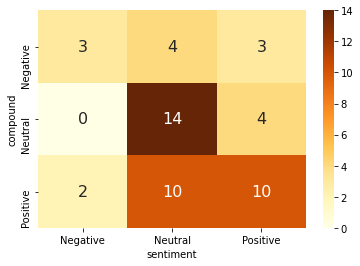

In [122]:
cm = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, xticklabels = ['Negative', 'Neutral','Positive'], yticklabels = ['Negative', 'Neutral','Positive'], cmap = cm)


In [123]:
print(classification_report(merged_df.compound, merged_df.Sentiment))

              precision    recall  f1-score   support

        -1.0       0.60      0.30      0.40        10
         0.0       0.50      0.78      0.61        18
         1.0       0.59      0.45      0.51        22

    accuracy                           0.54        50
   macro avg       0.56      0.51      0.51        50
weighted avg       0.56      0.54      0.52        50

